In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Python Version**

In [2]:
!python --version

Python 3.10.13


# **GPU Checking**

In [3]:
!nvidia-smi

Mon May  6 11:36:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print(f"GPU: {device}")
else:
    print("No GPU available.")

GPU: Tesla P100-PCIE-16GB


# **Importing Dependancies**

In [5]:
!pip install ultralytics==8.1.23

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [7]:
from ultralytics import RTDETR
from IPython.display import display, Image

In [8]:
import torch
print(torch.version.cuda)
torch.cuda.is_available()

12.1


True

# **Model Info**

In [9]:
model = RTDETR('/kaggle/input/rt-detr-realtime-detection-transformer-model/rtdetr-l.pt')

model.info()

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients, 108.3 GFLOPs


(673, 32970476, 0, 108.3437056)

# **Train**

In [10]:
!yolo train model=/kaggle/input/rt-detr-realtime-detection-transformer-model/rtdetr-l.pt data=/kaggle/input/fydp-yolov8-yaml/data.yaml epochs=50 imgsz=640 batch=8

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/rt-detr-realtime-detection-transformer-model/rtdetr-l.pt, data=/kaggle/input/fydp-yolov8-yaml/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

In [ ]:
#!yolo task=detect mode=train model=/kaggle/input/rt-detr-realtime-detection-transformer-model/rtdetr-l.pt data=/kaggle/input/fydp-yolov8-yaml/data.yaml  epochs=5  save=True  imgsz=640 batch=16

# **Train Result/Epoch**

In [ ]:
# from tabulate import tabulate
# import csv

# csv_file_path = '/kaggle/working/runs/segment/train/results.csv'

# with open(csv_file_path, 'r') as file:
#     csv_reader = csv.reader(file)
#     header = next(csv_reader)
#     data = list(csv_reader)

# print(tabulate(data, headers=header, tablefmt='grid'))

# **Result Graph**

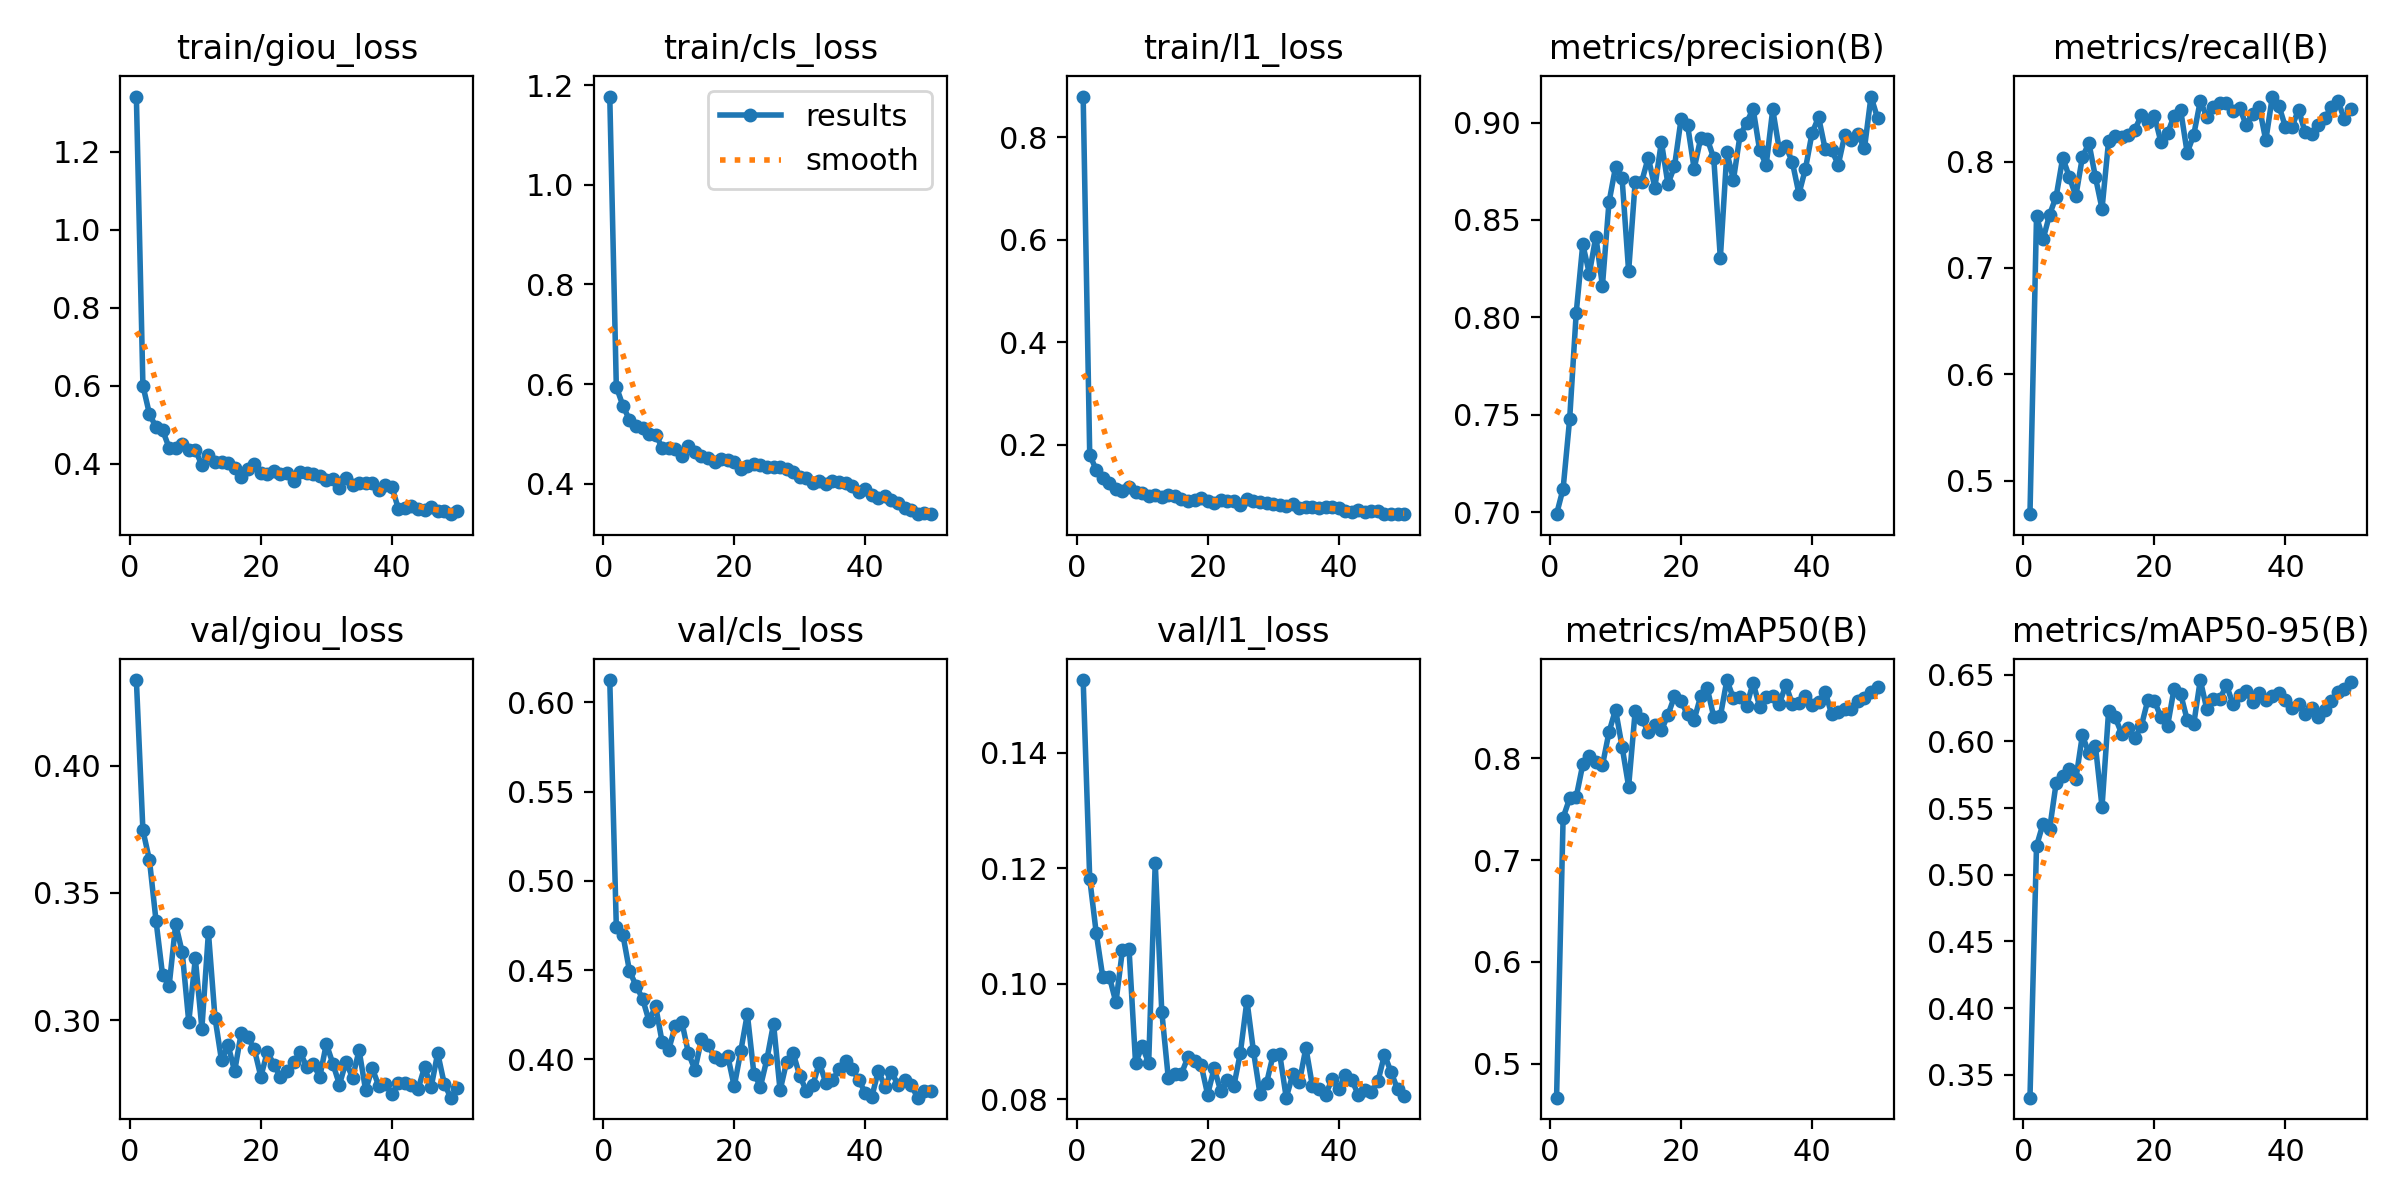

In [11]:
from IPython.display import display, Image

Image(filename="/kaggle/working/runs/detect/train/results.png", width=600)

# **Confusion Matrics**

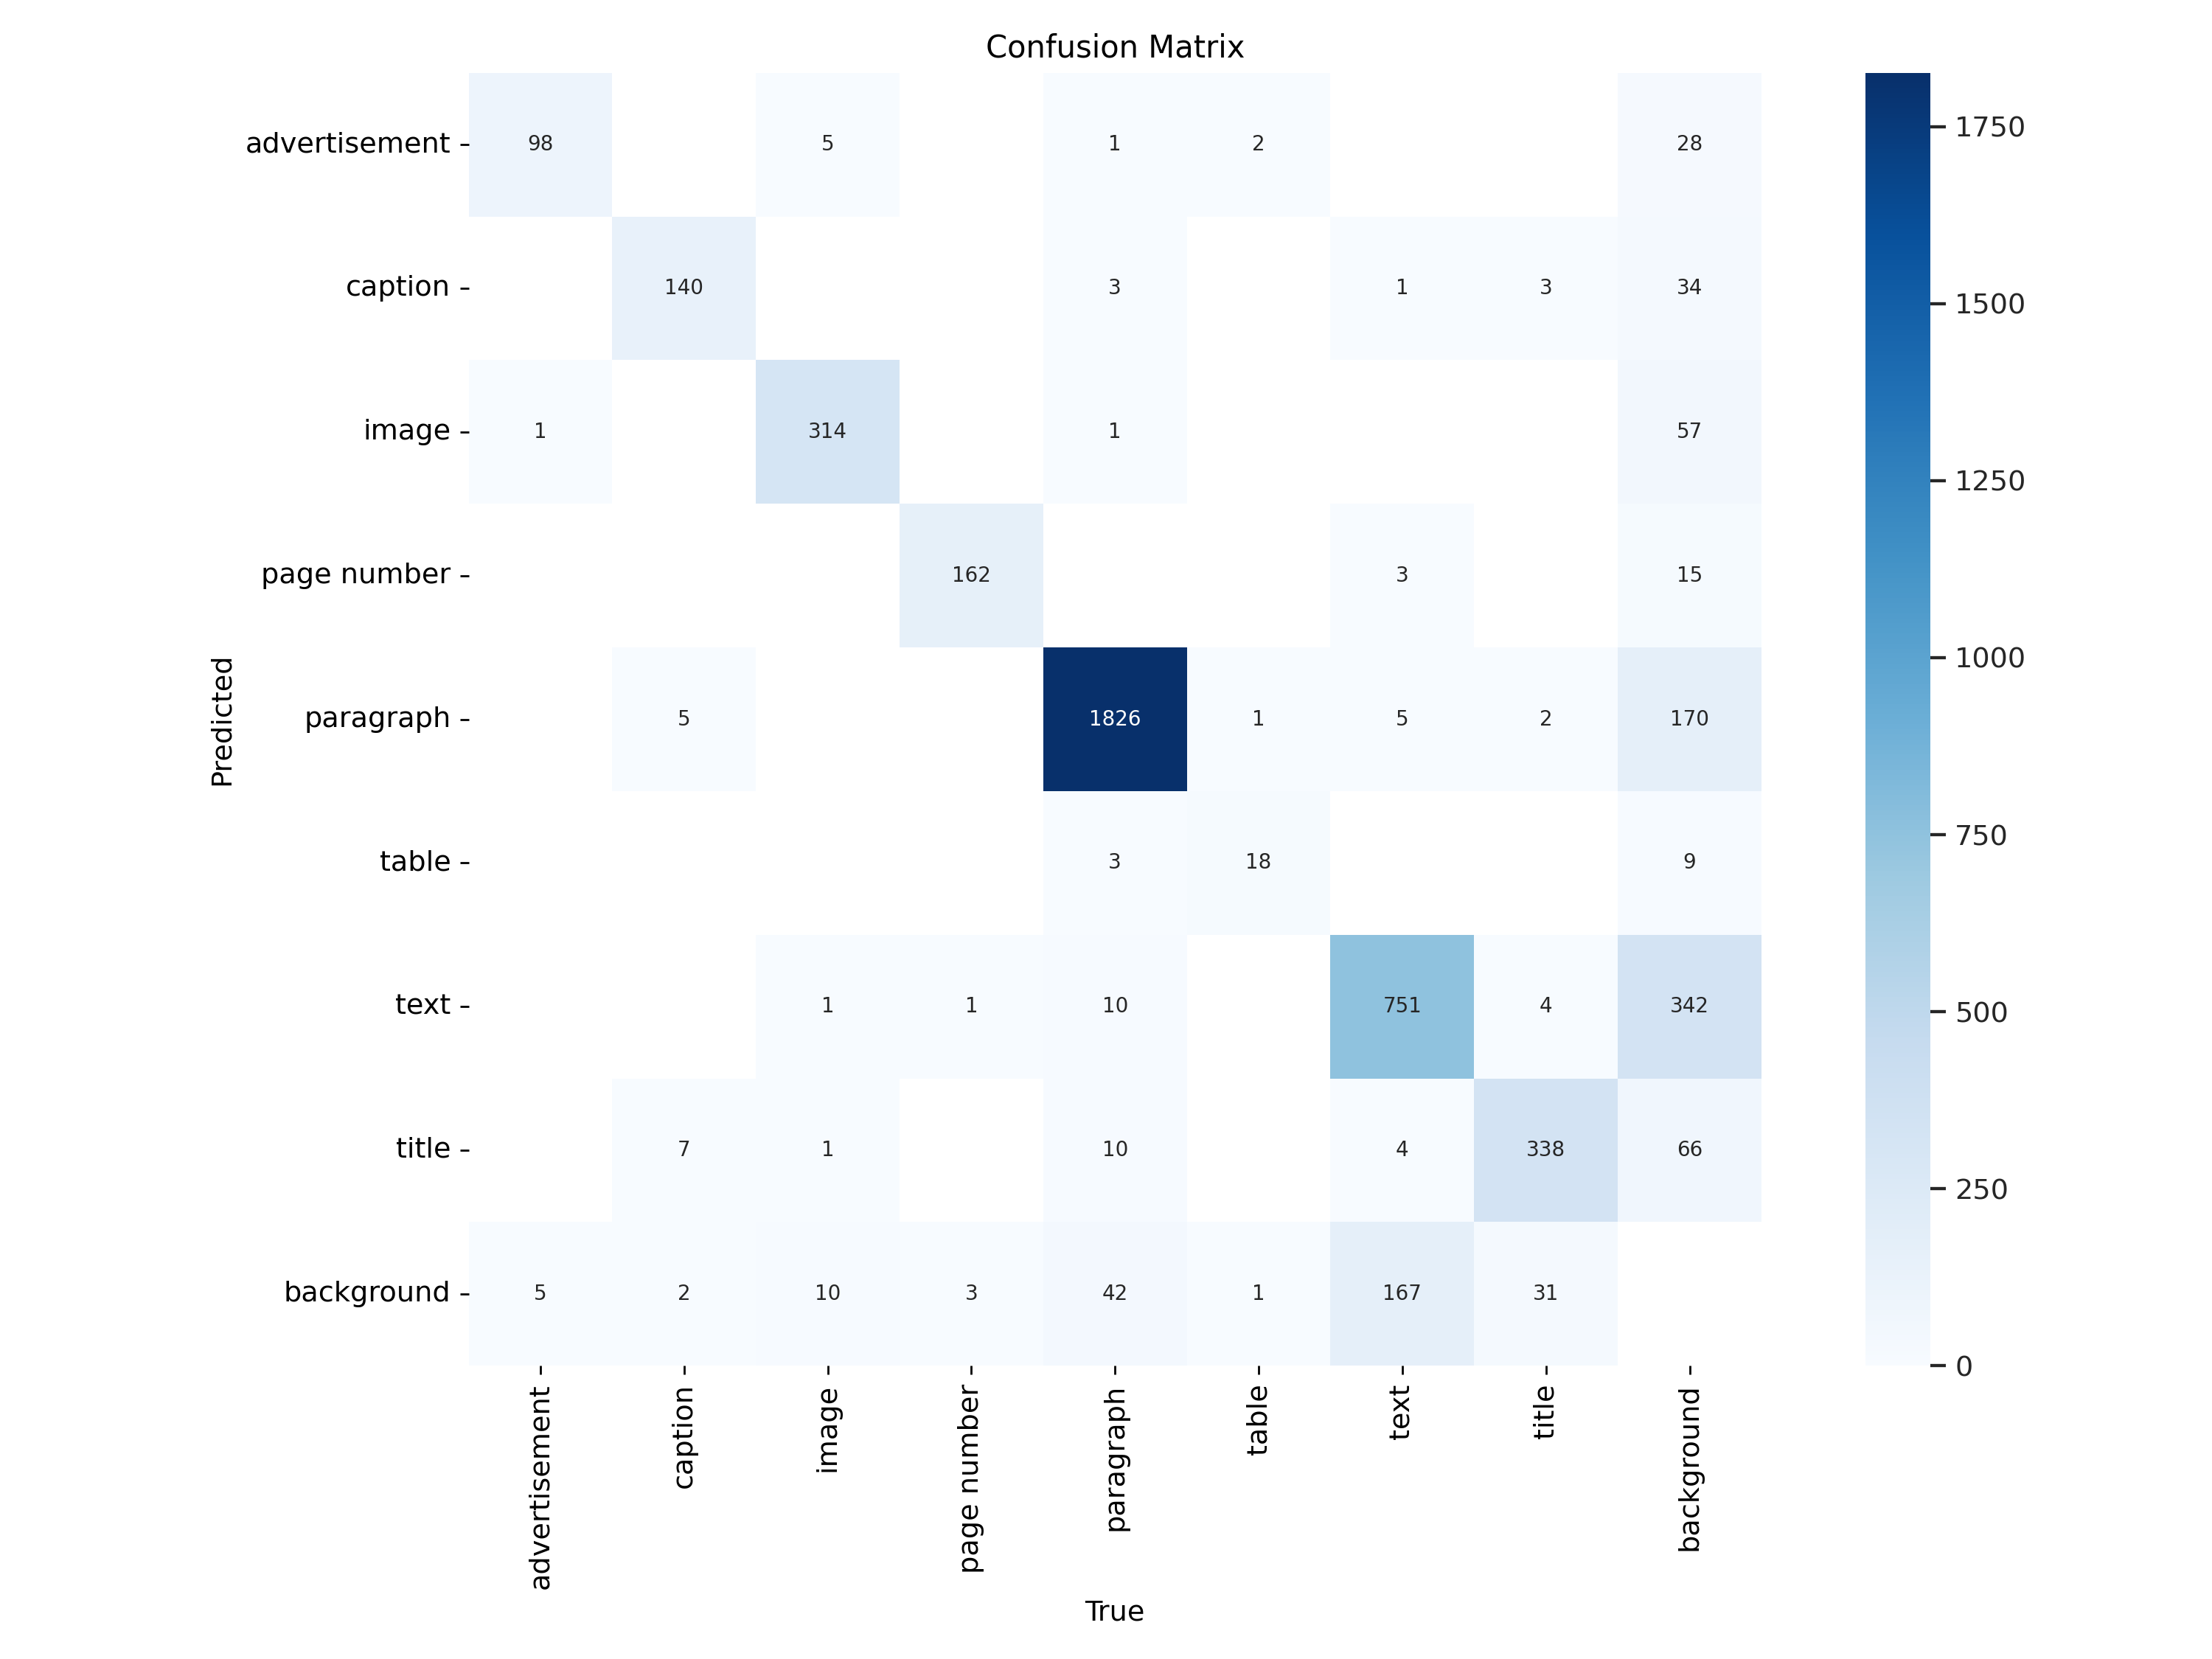

In [12]:
Image(filename="/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

# **F1 Score Curve**

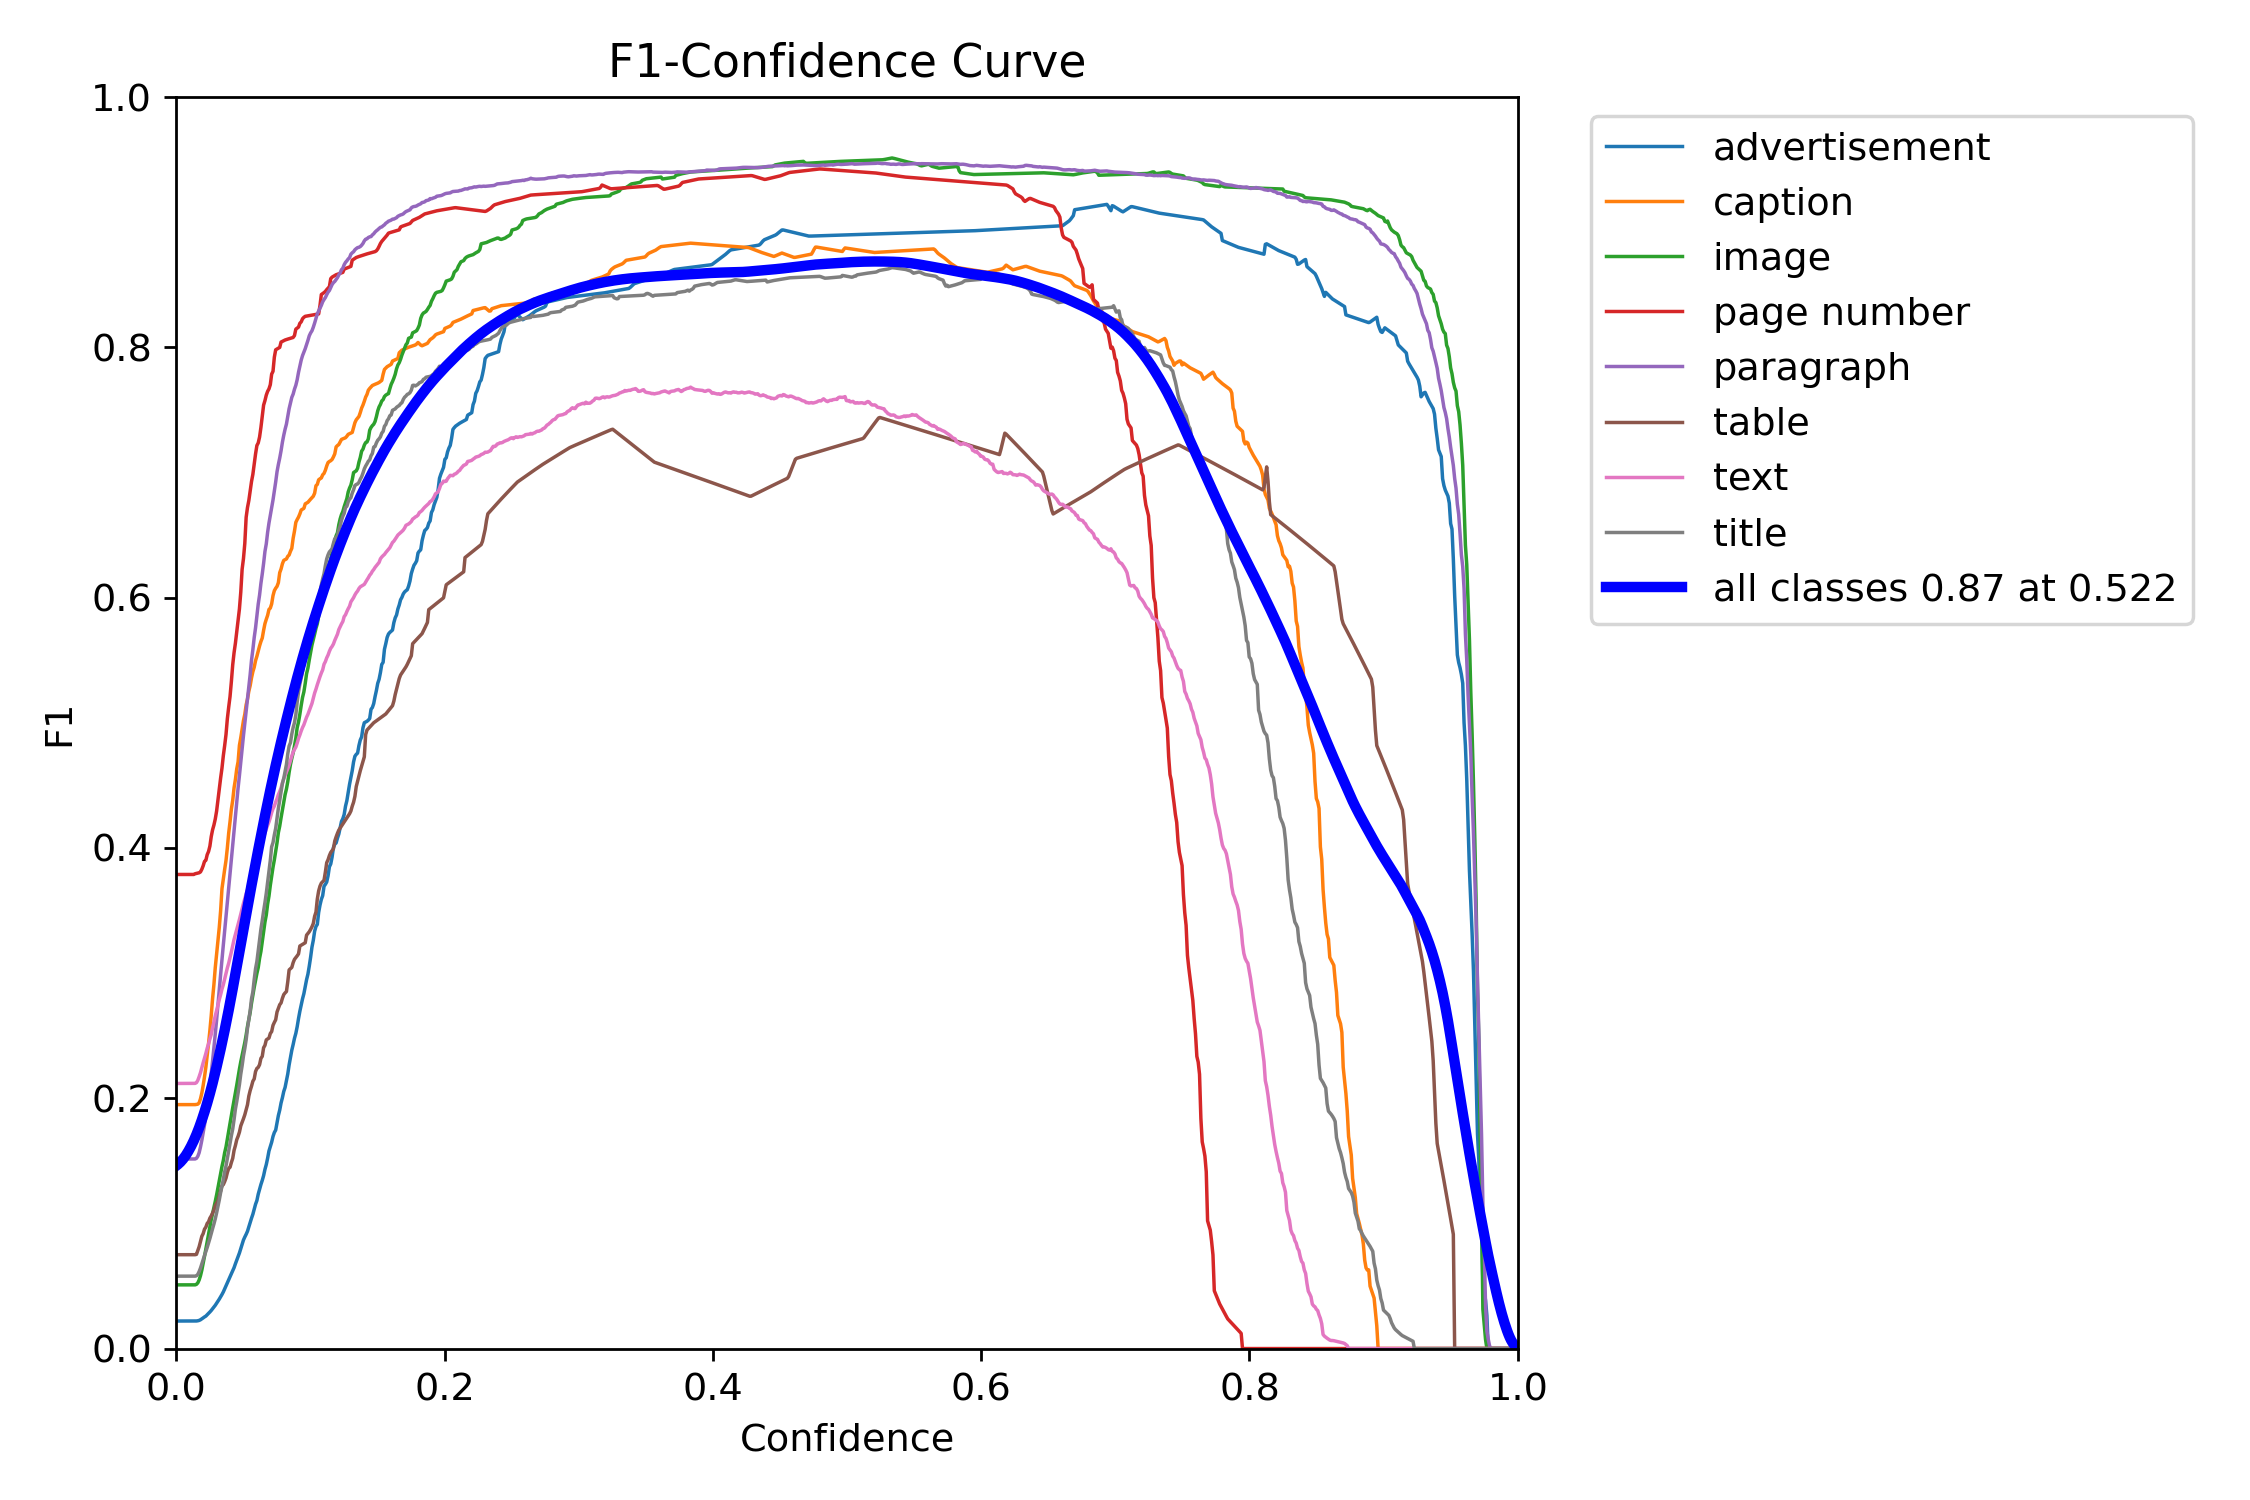

In [13]:
Image(filename="/kaggle/working/runs/detect/train/F1_curve.png", width=600)

# **Precision Curve**

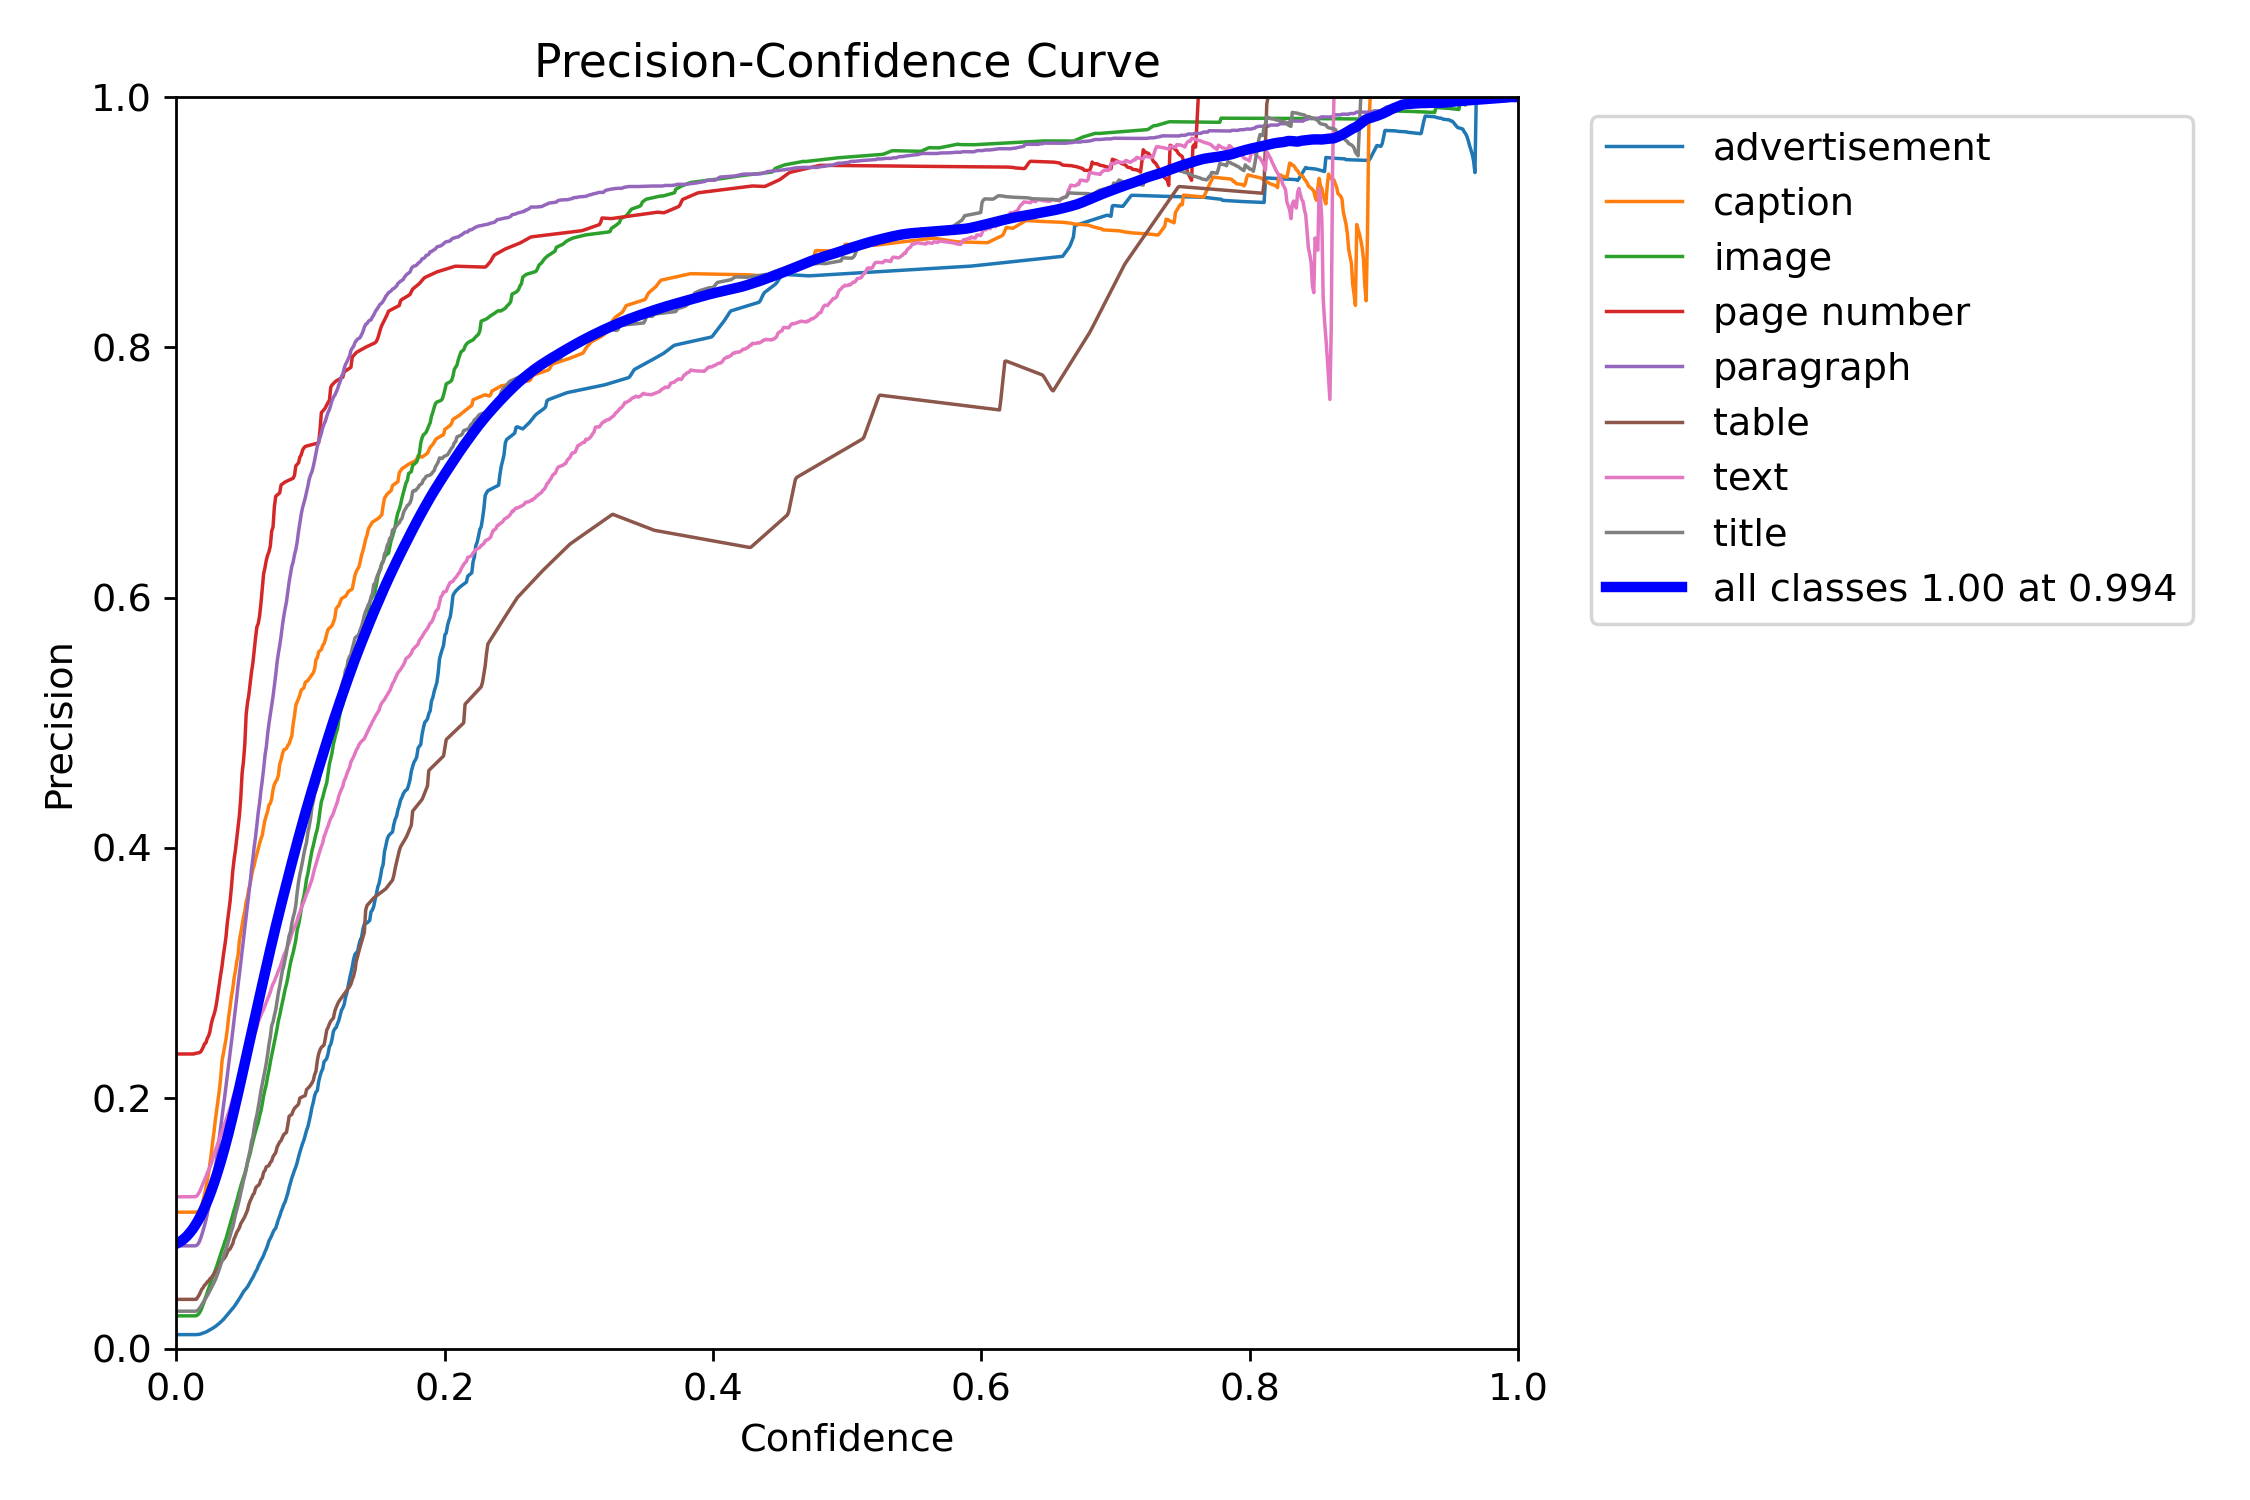

In [14]:
Image(filename="/kaggle/working/runs/detect/train/P_curve.png", width=600)

# **Recall Curve**

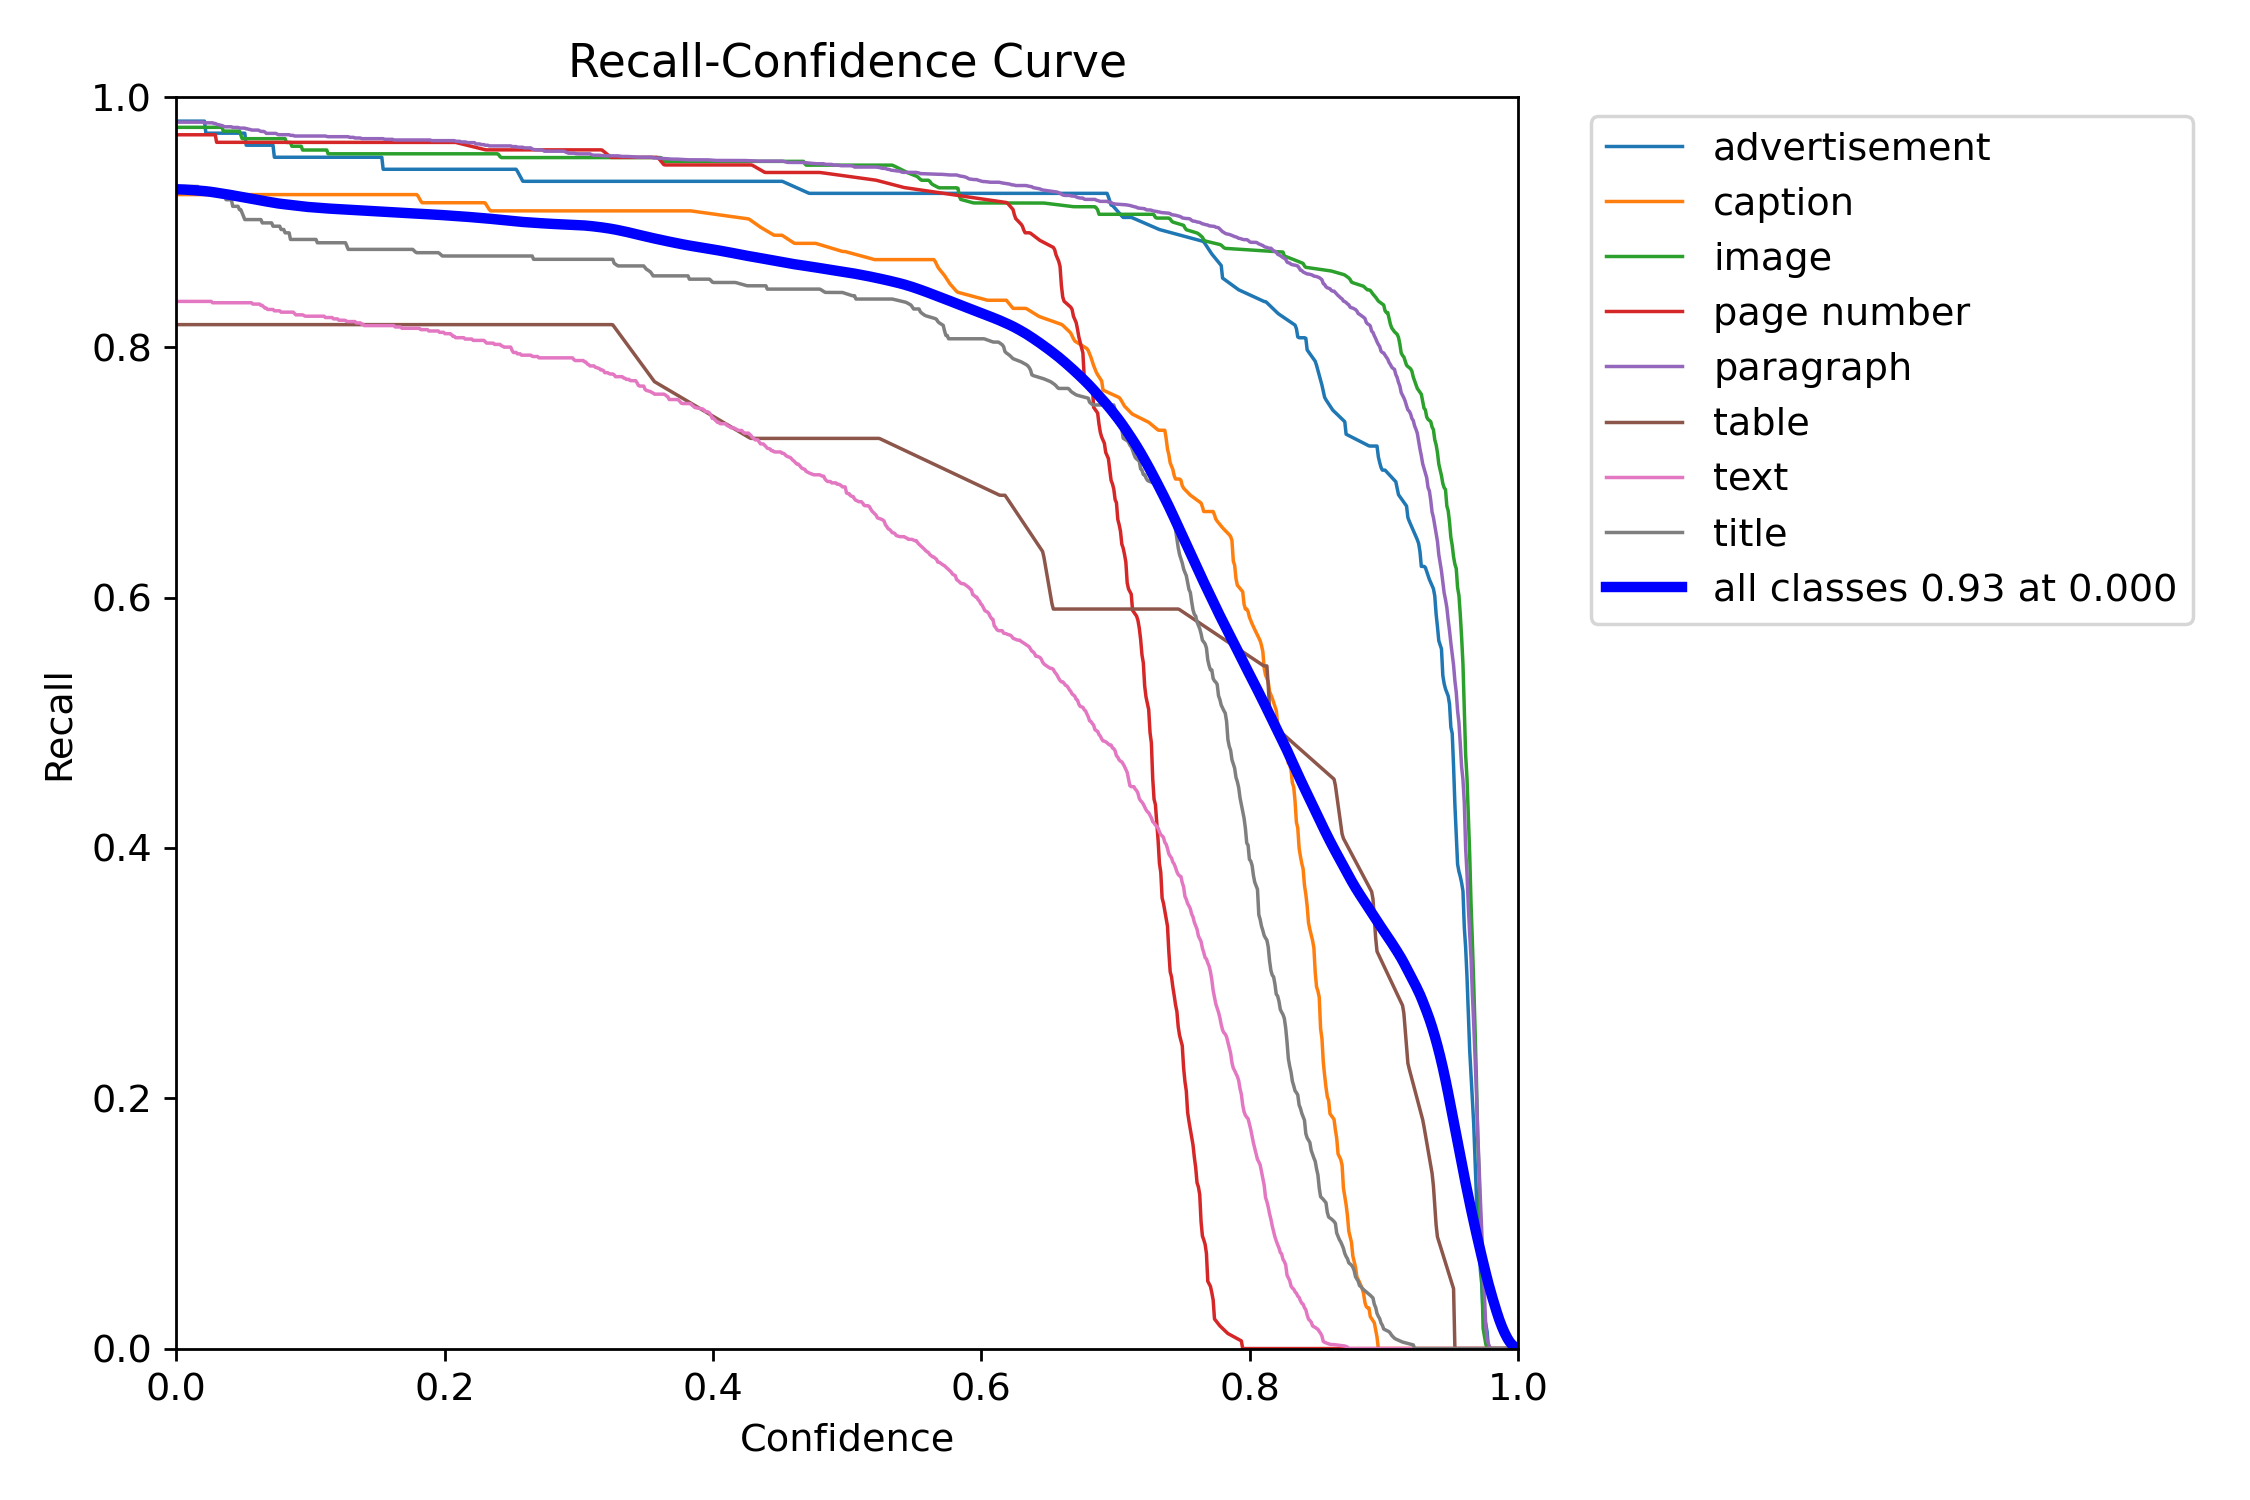

In [15]:
Image(filename="/kaggle/working/runs/detect/train/R_curve.png", width=600)

# **Precision-Recall Curve**

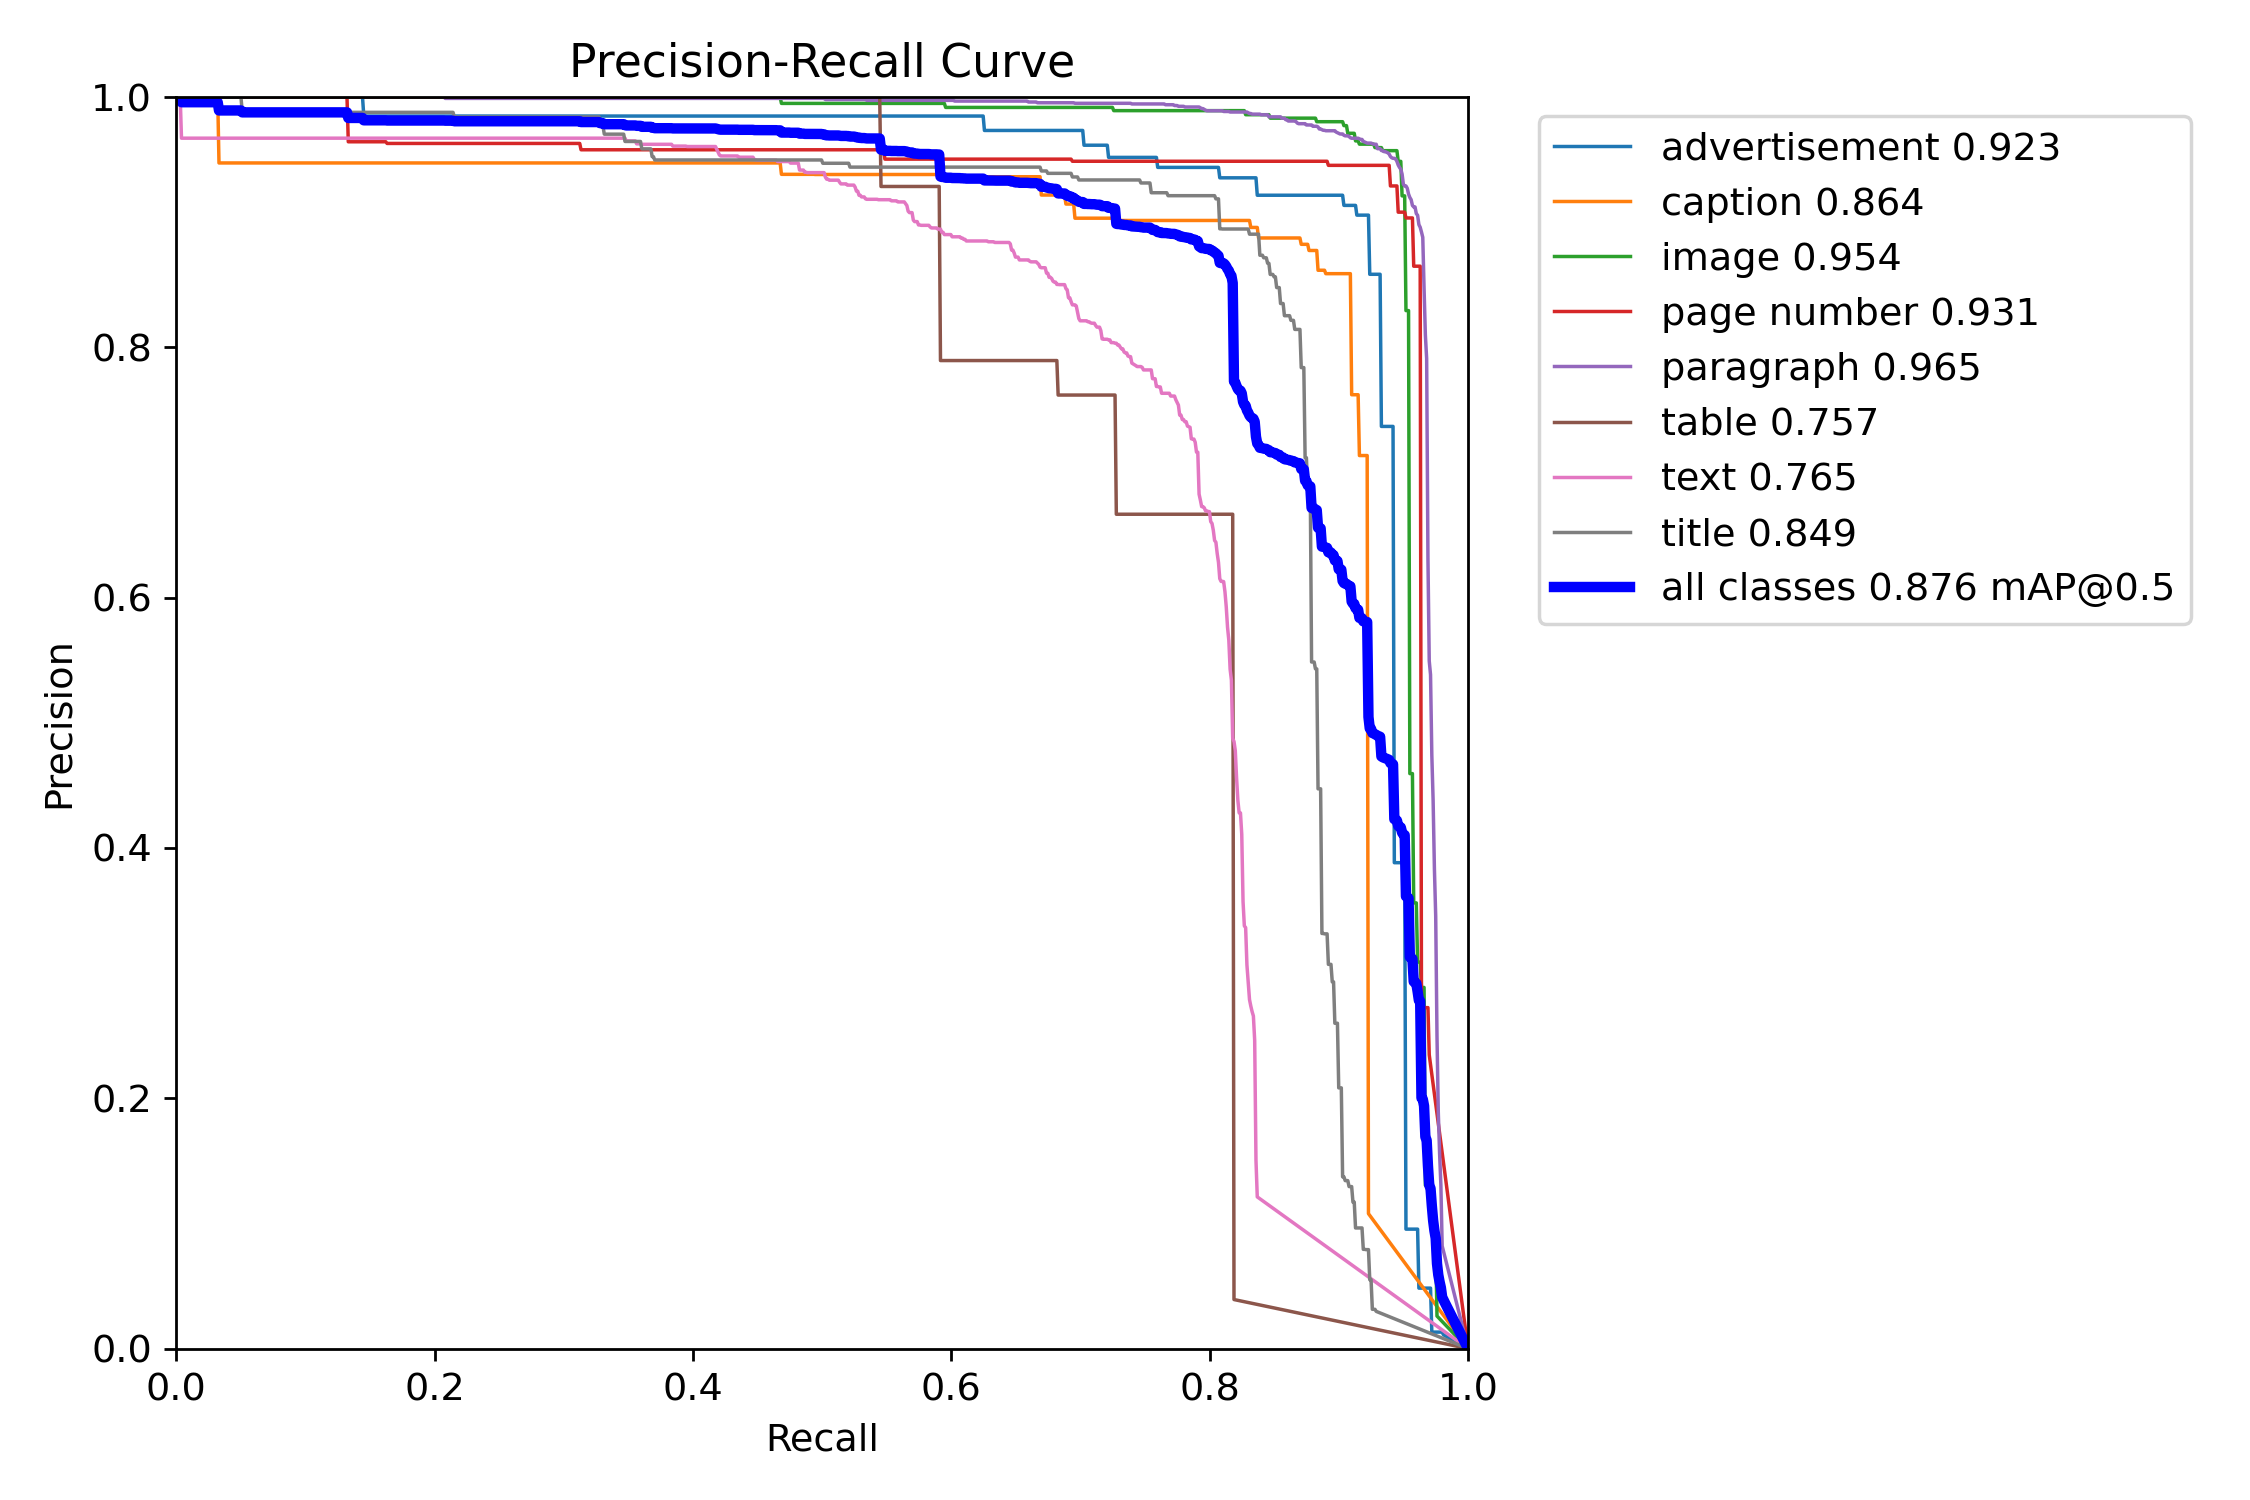

In [16]:
Image(filename="/kaggle/working/runs/detect/train/PR_curve.png", width=600)

# **Test**

In [ ]:
!yolo mode=predict  model=/kaggle/working/runs/detect/train/weights/best.pt  source="/kaggle/input/fydp-yolov8/FYDP_Yolov8/test/images"

# **Making Zip & Download Prediction**

In [ ]:
# import shutil
# import zipfile

# source_folder = '/kaggle/working/runs'
# zip_filename = '/kaggle/working/runs'
# shutil.make_archive(zip_filename, 'zip', source_folder)

# **Sample Test Images**

In [26]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/kaggle/working/runs/detect/predict3/b0ac278e-7f49-4091-ae2c-0fe9c4b55e65-at800_jpg.rf.7de7369c41649586e8cc896f3471c6e1.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

In [ ]:
# image = cv2.imread('/kaggle/working/runs/segment/predict/5e15e99f-258a-4958-a55e-8879d15d5d72_jpg.rf.2c26700c3d41d638b2fb6e6e65008a51.jpg')

# plt.figure(figsize=(10, 10))
# plt.imshow(image)
# plt.axis('off')  
# plt.show()

# **Working Directory Cleaner(If needed)**

In [ ]:
#!rm -rf /kaggle/working/*